# Vectorización, broadcasting e iteraciones

En clase hicimos experimentos con el método de Newton para buscar raíces complejas. Comenzando con condiciones iniciales reales vimos que el exponente de Lyapunov es positivo, lo cual nos dice que el sistema es intestable.

* __Ejercicio:__ Utilizar la librería   `FFTW` para calcular el espectro de potencias para cada condición inicial. Luego calcular el espectro de potencias promedio. Hay frecuencias dominantes?

* __Ejercicio:__ Crear una lista con tuplas que contengan la condición inicial usada y la etiqueta de la raíz a la que convegió el método para $x^2+4=0$. Si es posible, graficar con heatmap los resultados.

A continuación, veremos algunos trucos para hacer el código más eficiente y compacto.

## Como sumar en Julia (útil para calcular el exponente)

In [63]:
# Define the range for the series
n = 10

# Perform the indexed sum
indexed_sum = sum(i^2 for i in 1:n)

println(indexed_sum)  # Output: 385 (sum of squares from 1 to 10)

Error in Timer:


## Como calcular el espectro de potencia

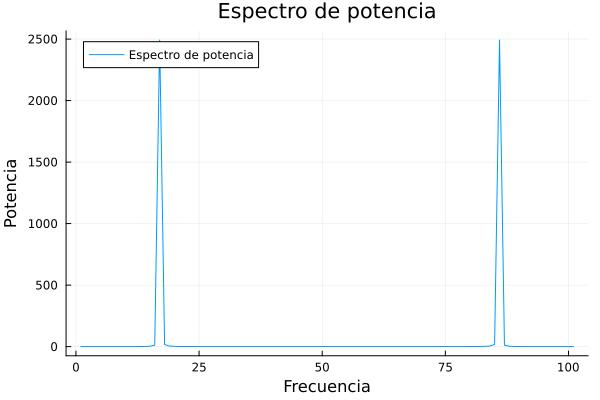

In [64]:
using FFTW

# Señal de juguete o serie de puntos
x = 0.0:0.1:10
signal = sin.(10*x)

# Definición de espectro de potencia
dft = abs.(fft(signal)).^2

using Plots

# Graficar la señal
plot(x, signal, label="Señal", xlabel="x", ylabel="y", title="Señal de juguete")

# Graficar el espectro de potencia
plot(dft, label="Espectro de potencia", xlabel="Frecuencia", ylabel="Potencia", title="Espectro de potencia")

In [65]:
map(x->2x, 1:10)

10-element Vector{Int64}:
  2
  4
  6
  8
 10
 12
 14
 16
 18
 20

## Iteración de muchas condiciones iniciales a la vez

In [3]:
# creamos una malla de números complejos, uso ; para evitar 
iniciales = [x + y*im for x in -2:0.001:2, y in -2:0.001:2];

Definimos una función en el sentido usual

In [4]:
f(x) = x - (x^4+4)/(4*x^3)

f (generic function with 1 method)

Copiamos la condicion inicial para crear un arreglo para iterar. La función de broadcast aparece compactificada como el punto (ver manual de Julia para más detalles). A continuación aplicamos `f` como ya se explicó, con  `f.` aplicamos la función a cada componente. Luego, como `=.` la idea es actualizar cada elemento de iterator, sin el punto nos dará error.

In [5]:
iterator = deepcopy(iniciales)
[iterator .= f.(iterator) for i in 1:100]
iterator

4001×4001 Matrix{ComplexF64}:
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im  …  -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im  …  -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
     ⋮                               ⋱                              ⋮
  1.0-1.0im   1.0-1.0im   1.0-1.0im      1.0+1.0im   1.0+1.0im   1.0+1.0im
  1.0-1.0im   1.0-1.0im   1.0-1.0im      1.0+1.0im   1.0+1.0im   1.0+1.0im


Si observan, en la tabla están las $4$ racíces.

Lo que sigue es hacer una función que etiquete las raíces de 1 a 4, para luego hacer el heatmap.

In [6]:
# Primero un vecort que contenga las raices.
raices = [x+im*y for x in -1:2:1, y in -1:2:1]

2×2 Matrix{Complex{Int64}}:
 -1-1im  -1+1im
  1-1im   1+1im

In [7]:
# Ahora creamos una función que nos identifique las raices y asigne un cero cuando los valores no convergen.
function convert_root(root)
    tolerance = 1e-6
    if abs(root-raices[1]) < tolerance
        return 1
    elseif abs(root-raices[2]) < tolerance
        return 2
    elseif abs(root-raices[3]) < tolerance
        return 3
    elseif abs(root-raices[4]) < tolerance
        return 4
    else
        return 0
    end
end

convert_root (generic function with 1 method)

In [8]:
# Aplicamos la función al arreglo
toplot = convert_root.(iterator);

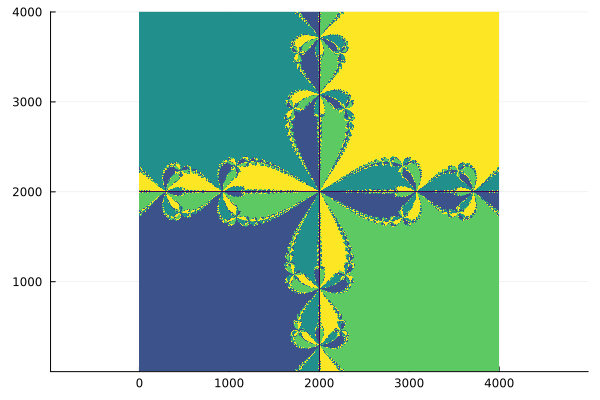

In [9]:
using Plots

#heatmap
heatmap(toplot, c=:viridis, aspect_ratio=1, color=:grays, legend=false)

Nótese que ``heatmap`` recibe una matriz

In [14]:
@doc heatmap

```
heatmap(x,y,z)
heatmap!(x,y,z)
```

Plot a heatmap of the rectangular array `z`.

# Keyword arguments

  * `aspect_ratio::Union{Real, Symbol}`: Plot area is resized so                  that 1 y-unit is the same size as                  `aspect_ratio` x-units. With `:none`, images inherit                  aspect ratio of the plot area. Use `:equal` for                  unit aspect ratio. Aliases: (:aspect*ratios,                  :aspectratio, :aspectratios, :axis*ratio, :axisratio,                  :ratio).

# Example

```julia-repl
julia> heatmap(randn(10,10))
```


Otra forma de iterar arreglos, cuyos detalles se explicarán en clase:

In [12]:
function f!(x::Matrix{Complex{Float64}})
    x.= f.(x) 
end

f! (generic function with 1 method)

In [13]:
iterator = deepcopy(iniciales);
for i in 1:10
    f!(iterator)
end
iterator

4001×4001 Matrix{ComplexF64}:
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im  …  -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im  …  -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
 -1.0-1.0im  -1.0-1.0im  -1.0-1.0im     -1.0+1.0im  -1.0+1.0im  -1.0+1.0im
     ⋮                               ⋱                              ⋮
  1.0-1.0im   1.0-1.0im   1.0-1.0im      1.0+1.0im   1.0+1.0im   1.0+1.0im
  1.0-1.0im   1.0-1.0im   1.0-1.0im      1.0+1.0im   1.0+1.0im   1.0+1.0im


## Ejercicios
* Para los que no vinieron, favor de reproducir lo hecho aquí para $x^4-4=0$ y $x^3+1=0$